## Programming Lab #2
## Foundations of Machine Learning

The purpose of this project is to build predictive algorithms that predict the likelihood a person has a stroke. The data include:
  
  - `age`: Patient age, numeric
  - `avg_glucose_level`: Blood sugar levels, numeric
  - `bmi`: Body mass index, numeric
  - `ever_married`: Ever married, dummy/character (Yes, No)
  - `gender`: Male, Female, or Other, character
  - `heart_disease`: Has heart disease, dummy
  - `hypertension`: Has hypertension, dummy
  - `id`: Study identification number
  - `Residence_type`: Type of residence, dummy/character (Urban, Rural)
  - `smoking_status`: Former, never, or current smoker, categorical
  - `work_type`: Employment type (Never worked (Never_worked), homemaker ("children"), Public sector employment (Govt_job), Private sector employment (`Private`), Self-employed (`Self-employed`)
  - `stroke`: Suffered a stroke in the sample period
  
The data come in two files: `training_data.csv`, which you should use to build your models, and `testing_data.csv`, which you should use to test your models. The models must be trained on the training data and tested on the testing data, but providing both files allows you to experiment with your choices and iterate on model designs. If performance drops on the testing data, you know there's a problem.
  
You can use any of the tools presented in class: $k$ nearest neighbor, linear models, or decision trees. In principle, $k$ means clustering might also be helpful for looking for patterns in the data that the other methods might miss. Using canned versions of more advanced tools (boosting, bagging, random forests, neural networks, etc.) is deeply unsporting and thus not allowed. You can be creative about transforming variables, or combining decision trees with linear models or $k$NN. Try something interesting. Fail extravagantly. The goal is to work on an intellectually interesting question that is similar to the tasks that data scientists are called on to do every day.
  
We will compare the groups' models to see if there are common trends or significant differences, and also to declare **The Winners** on the basis of whichever team achieves the lowest $RMSE$ on the testing data. A simple linear model with some polynomials and dummy variables achieves an $R^2$ of .087 and a $RMSE$ of .206. 

In [15]:
# Initalizing a print function to limit repetition

def pn(x):
    print(x, '\n')

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_csv('./data/training_data.csv')
df_test = pd.read_csv('./data/testing_data.csv')
pn(df_train.head()) # view the dataframe

gdf_train = pd.DataFrame.copy(df_train) # make df that we can edit
gdf_test = pd.DataFrame.copy(df_test) # make df that we can edit

# Look at some stats
pn(gdf_train.describe())  #see that bmi is the one missing values
pn(gdf_test.describe()) #see that bmi is the one missing values

   Unnamed: 0     id  gender   age  hypertension  heart_disease ever_married  \
0        2465  68685    Male  36.0             0              0          Yes   
1        4311  59058  Female  45.0             0              0          Yes   
2        2375  46068    Male  58.0             0              0           No   
3        5017  36837  Female  61.0             0              0          Yes   
4         753  30550  Female  78.0             0              0           No   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0       Govt_job          Urban              65.87  32.2  formerly smoked   
1       Govt_job          Rural              68.66  25.3     never smoked   
2  Self-employed          Rural             170.93  30.7          Unknown   
3  Self-employed          Urban              69.88  27.1     never smoked   
4        Private          Urban             103.86  30.6          Unknown   

   stroke  
0       0  
1       0  
2       0  
3       

In [17]:
# Impute bmi missing values
#gdf_train['bmi'] = gdf_train['bmi'].fillna(gdf_train['bmi'].mean())
#gdf_test['bmi'] = gdf_test['bmi'].fillna(gdf_test['bmi'].mean())

# Look at some stats
pn(gdf_train.describe())  # check if bmi was imputed
pn(gdf_test.describe()) # check if bmi was imputed

        Unnamed: 0            id          age  hypertension  heart_disease  \
count  4087.000000   4087.000000  4087.000000   4087.000000    4087.000000   
mean   2561.672865  36383.068265    43.324169      0.097871       0.056031   
std    1474.961020  21189.857848    22.531019      0.297177       0.230010   
min       1.000000     67.000000     0.080000      0.000000       0.000000   
25%    1295.500000  17417.500000    26.000000      0.000000       0.000000   
50%    2556.000000  36814.000000    45.000000      0.000000       0.000000   
75%    3831.500000  54584.500000    61.000000      0.000000       0.000000   
max    5110.000000  72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        4087.000000  3928.000000  4087.000000  
mean          106.010396    28.923371     0.048691  
std            45.047912     7.843083     0.215248  
min            55.120000    10.300000     0.000000  
25%            77.295000    23.6

In [18]:
### Data Cleaning

## cleaning smoking_status var:
#for smoking status two options: remove nulls or make unkowns as a smoker
#removing Unknown values for smoking
var = 'smoking_status'
pn(gdf_train[var].value_counts()) #1241 unknown values for smoking status of train, which is 30% of data 
pn(gdf_test[var].value_counts()) #303 unknown values for smoking status of test
gdf_train[var] = gdf_train[var].replace('Unknown', np.nan)
gdf_test[var] = gdf_test[var].replace('Unknown', np.nan)
gdf_train[var+'_NA'] = gdf_train[var].isnull()
gdf_test[var+'_NA'] = gdf_test[var].isnull()
print('Total Missings: \n', sum(gdf_train[var].isnull()),'\n') # confirms checks for NAs
print('Total Missings: \n', sum(gdf_test[var].isnull()),'\n') # confirms checks for NAs 

never smoked       1505
Unknown            1241
formerly smoked     699
smokes              642
Name: smoking_status, dtype: int64 

never smoked       387
Unknown            303
formerly smoked    186
smokes             147
Name: smoking_status, dtype: int64 

Total Missings: 
 1241 

Total Missings: 
 303 



In [19]:
#change to smokes
var = 'smoking_status'
pn(gdf_train[var].value_counts()) #1241 unknown values for smoking status of train, which is 30% of data 
pn(gdf_test[var].value_counts()) #303 unknown values for smoking status of test
gdf_train[var] = gdf_train[var].replace('Unknown', 'smokes')
gdf_test[var] = gdf_test[var].replace('Unknown', 'smokes')
pn(gdf_train[var].value_counts())
pn(gdf_test[var].value_counts())

never smoked       1505
formerly smoked     699
smokes              642
Name: smoking_status, dtype: int64 

never smoked       387
formerly smoked    186
smokes             147
Name: smoking_status, dtype: int64 

never smoked       1505
formerly smoked     699
smokes              642
Name: smoking_status, dtype: int64 

never smoked       387
formerly smoked    186
smokes             147
Name: smoking_status, dtype: int64 



In [20]:
print(pd.crosstab(gdf_train[var],gdf_train['stroke']),'\n') #cant assume anything with the stroke, but appears that former smokers are more likely to have a stroke by a little
print(pd.crosstab(gdf_test[var],gdf_test['stroke']),'\n') #cant assume anything with the stroke 

#no cross tab helping lead to any answers

stroke              0   1
smoking_status           
formerly smoked   645  54
never smoked     1434  71
smokes            605  37 

stroke             0   1
smoking_status          
formerly smoked  170  16
never smoked     368  19
smokes           142   5 



In [21]:
# Removing missing values for smoking status
#gdf_train= gdf_train.dropna(subset=[var])
#pn(gdf_train[var].describe()) # looks like the stats did not change
#print('Total Missings After Drop: \n', sum(gdf_train[var].isnull()),'\n') # checks to see if drop was successful
#gdf_test= gdf_test.dropna(subset=[var])
#pn(gdf_test[var].describe()) # looks like the stats did not change
#print('Total Missings After Drop: \n', sum(gdf_test[var].isnull()),'\n') # checks to see if drop was successful

In [22]:
## cleaning id var:

missing_values_train = gdf_train['id'].isnull().sum()
missing_values_test = gdf_test['id'].isnull().sum()

# print the number of missing values
print(f"Number of missing values in training set 'id' column: {missing_values_train}")
print(f"Number of missing values in training set 'id' column: {missing_values_test}")

# Check for duplicated id values
duplicated_ids_train = gdf_train.duplicated('id').sum()
duplicated_ids_test = gdf_test.duplicated('id').sum()

# If there are any duplicated IDs, 'duplicated_ids' will contain those rows
print(f"\nduplicated IDs found in training set: {duplicated_ids_train}" )
print(f"duplicated IDs found in testing set: {duplicated_ids_train}")

# id values seem clean

Number of missing values in training set 'id' column: 0
Number of missing values in training set 'id' column: 0

duplicated IDs found in training set: 0
duplicated IDs found in testing set: 0


In [23]:
## cleaning Residence_type var:

# print unique variables
print("Unique Residence_type values in training set:", gdf_train["Residence_type"].unique())
print("Unique Residence_type values in testing set:", gdf_test["Residence_type"].unique())

# Check for nans
print('Total Missings: \n', sum(gdf_train[var].isnull()),'\n') # confirms checks for NAs
print('Total Missings: \n', sum(gdf_test[var].isnull()),'\n') # confirms checks for NAs 

# Residence_type var already seems clean

Unique Residence_type values in training set: ['Urban' 'Rural']
Unique Residence_type values in testing set: ['Urban' 'Rural']
Total Missings: 
 1241 

Total Missings: 
 303 



In [24]:
print(pd.crosstab(gdf_train["Residence_type"],gdf_train['stroke']),'\n') # Urban areas may have slightly higher stroke rates
print(pd.crosstab(gdf_test["Residence_type"],gdf_test['stroke']),'\n') 

stroke             0    1
Residence_type           
Rural           1941   94
Urban           1947  105 

stroke            0   1
Residence_type         
Rural           459  20
Urban           514  30 



In [25]:
## cleaning work_type var:

var = 'work_type'
print(gdf_train[var].value_counts()) #no unknowns, they add up to 4087
print(gdf_test[var].value_counts()) #no unknowns, adds up to 1023
print('Total Missings: \n', sum(gdf_train[var].isnull()),'\n') # confirms checks for NAs
print('Total Missings: \n', sum(gdf_test[var].isnull()),'\n') # confirms checks for NAs 
# no need to clean anything

Private          2329
Self-employed     667
children          542
Govt_job          534
Never_worked       15
Name: work_type, dtype: int64
Private          596
Self-employed    152
children         145
Govt_job         123
Never_worked       7
Name: work_type, dtype: int64
Total Missings: 
 0 

Total Missings: 
 0 



In [26]:
print(pd.crosstab(gdf_train[var],gdf_train['stroke']),'\n') # Self-employed may have slightly higher stroke rates
print(pd.crosstab(gdf_test[var],gdf_test['stroke']),'\n') 

stroke            0    1
work_type               
Govt_job        506   28
Never_worked     15    0
Private        2210  119
Self-employed   617   50
children        540    2 

stroke           0   1
work_type             
Govt_job       118   5
Never_worked     7   0
Private        566  30
Self-employed  137  15
children       145   0 



count    4087.000000
mean       43.324169
std        22.531019
min         0.080000
25%        26.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64 

count    1023.000000
mean       42.836872
std        22.942857
min         0.160000
25%        24.000000
50%        44.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64 

Total Missings: 
 0 

Total Missings: 
 0 



<Axes: >

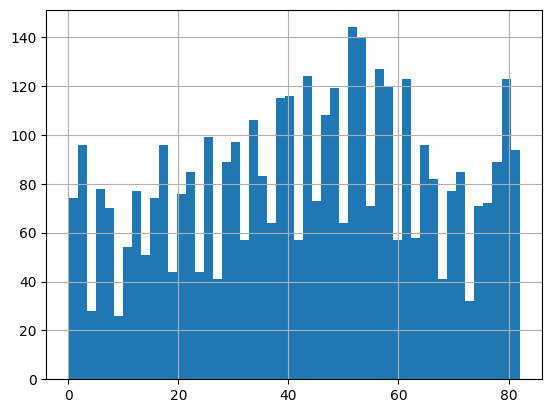

In [27]:
## cleaning age var:
var = 'age'

# Exploring missing values
pn(gdf_train[var].describe()) # looks good, numeric, ages range from 0 to 82
pn(gdf_test[var].describe()) # looks good, numeric, ages range from 0 to 82
print('Total Missings: \n', sum(gdf_train[var].isnull()),'\n') # confirms checks for NAs
print('Total Missings: \n', sum(gdf_test[var].isnull()),'\n') # confirms checks for NAs 
# No nulls need to be removed, this finding is compatible with the value count listed in the describe() output above

# Take a look at age distribution in sample
gdf_train[var].hist(bins=50)

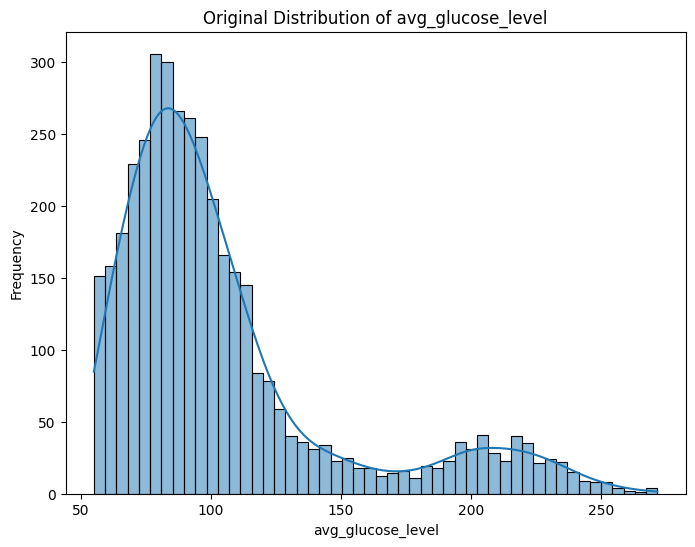

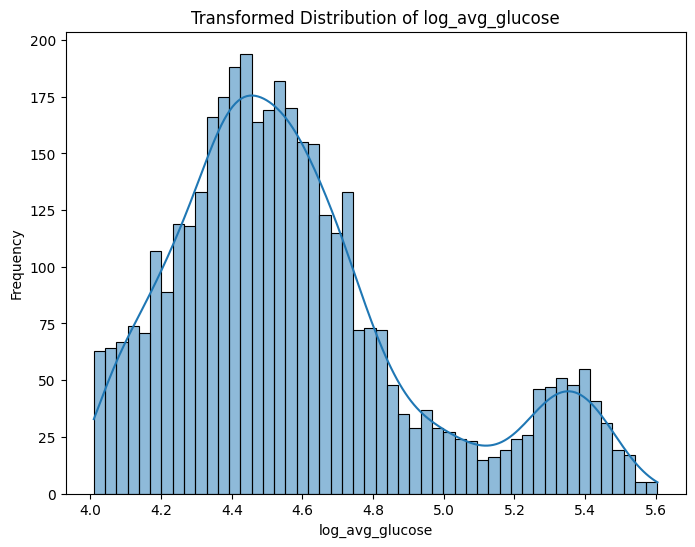

Total Missings in Training Set:  0
Total Missings in Test Set:  0


In [79]:
# Define the variable
var = 'avg_glucose_level'

# Take a look at the original distribution
plt.figure(figsize=(8, 6))
sns.histplot(gdf_train[var], bins=50, kde=True)
plt.title('Original Distribution of avg_glucose_level')
plt.xlabel('avg_glucose_level')
plt.ylabel('Frequency')
plt.show()

# Apply log transformation to 'avg_glucose_level'
gdf_train['log_avg_glucose'] = np.log(gdf_train[var])
gdf_test['log_avg_glucose'] = np.log(gdf_test[var])

# Check the transformed distribution
plt.figure(figsize=(8, 6))
sns.histplot(gdf_train['log_avg_glucose'], bins=50, kde=True)
plt.title('Transformed Distribution of log_avg_glucose')
plt.xlabel('log_avg_glucose')
plt.ylabel('Frequency')
plt.show()

# Exploring missing values (just to confirm)
print('Total Missings in Training Set: ', gdf_train['log_avg_glucose'].isnull().sum())
print('Total Missings in Test Set: ', gdf_test['log_avg_glucose'].isnull().sum())


In [77]:
bins = [50, 75, 100, 125, 150,175,200,225,250,275,300]
labels = ['50-75', '76-100', '101-125', '126-150','151-175','176-200','201-225','226-250','251-275','276-300']
gdf_train['glucose_group'] = pd.cut(gdf_train[var], bins=bins, labels=labels)
cross_tab = pd.crosstab(gdf_train['glucose_group'], gdf_train['stroke'])
print(cross_tab)

gdf_test['glucose_group'] = pd.cut(gdf_test[var], bins=bins, labels=labels)
cross_tab = pd.crosstab(gdf_test['glucose_group'], gdf_test['stroke'])
print(cross_tab)

stroke            0   1
glucose_group          
50-75           841  27
76-100         1501  49
101-125         747  24
126-150         201   9
151-175          94   5
176-200         107  18
201-225         163  23
226-250          86  13
251-275          16   3
stroke           0   1
glucose_group         
50-75          204  11
76-100         391   6
101-125        169   5
126-150         57   1
151-175         22   1
176-200         23   4
201-225         49   5
226-250         26   3
251-275          2   2


count    3927.000000
mean       28.925032
std         7.843391
min        10.300000
25%        23.600000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64 

Total Missings: 
 0 

count    981.000000
mean      28.772579
std        7.900756
min       11.500000
25%       23.300000
50%       27.900000
75%       32.900000
max       64.800000
Name: bmi, dtype: float64 

Total Missings: 
 0 

Axes(0.125,0.11;0.775x0.77)


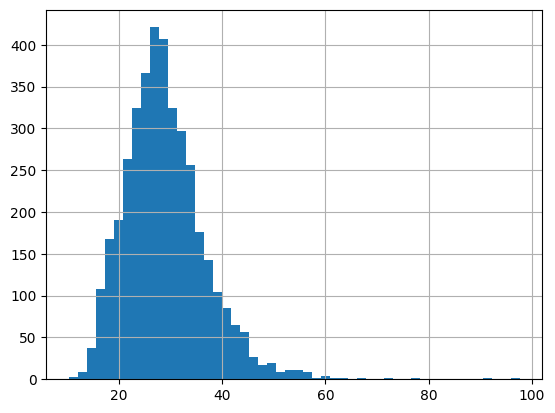

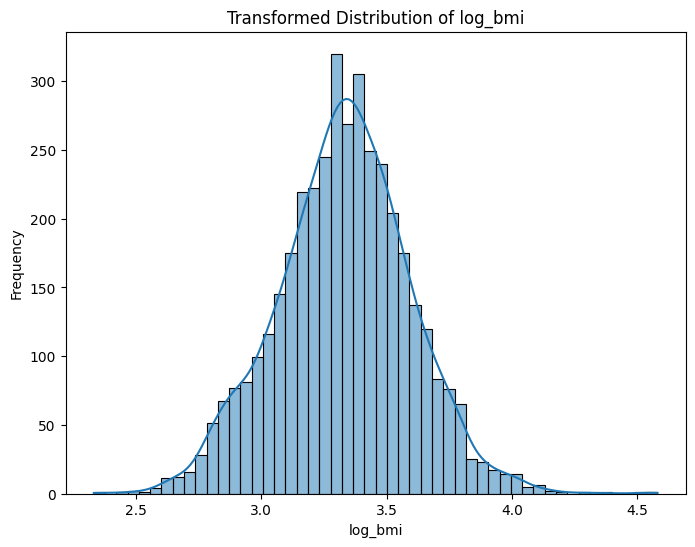

In [84]:
## cleaning bmi var:
var = 'bmi'

# Exploring mising values
pn(gdf_train[var].describe()) # some are missing
print('Total Missings: \n', sum(gdf_train[var].isnull()),'\n') # checks for number of NAs, about 3.9% of sample
pn(gdf_test[var].describe()) # some are missing
print('Total Missings: \n', sum(gdf_test[var].isnull()),'\n') # checks for number of NAs, about 3.8% of sample
# Because the missing values make up less than 5% of the samples, the nans will be removed

# Take a look at bmi distribution in sample
print(gdf_train[var].hist(bins=50))


# Apply log transformation to 'avg_glucose_level'
gdf_train['log_bmi'] = np.log(gdf_train[var])
gdf_test['log_bmi'] = np.log(gdf_test[var])

# Check the transformed distribution
plt.figure(figsize=(8, 6))
sns.histplot(gdf_train['log_bmi'], bins=50, kde=True)
plt.title('Transformed Distribution of log_bmi')
plt.xlabel('log_bmi')
plt.ylabel('Frequency')
plt.show()


count    3927.000000
mean        3.329808
std         0.263947
min         2.332144
25%         3.161247
50%         3.335770
75%         3.499533
max         4.580877
Name: log_bmi, dtype: float64 

Total Missings After Drop: 
 0 

count    981.000000
mean       3.323101
std        0.269601
min        2.442347
25%        3.148453
50%        3.328627
75%        3.493473
max        4.171306
Name: log_bmi, dtype: float64 

Total Missings After Drop: 
 0 

Axes(0.125,0.11;0.775x0.77)


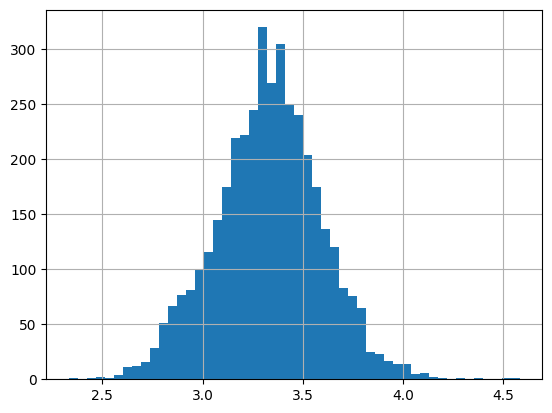

In [86]:
# Removing missing values
var = 'log_bmi'
gdf_train= gdf_train.dropna(subset=[var])
pn(gdf_train[var].describe()) # looks like the stats did not change
print('Total Missings After Drop: \n', sum(gdf_train[var].isnull()),'\n') # checks to see if drop was successful
gdf_test= gdf_test.dropna(subset=[var])
pn(gdf_test[var].describe()) # looks like the stats did not change
print('Total Missings After Drop: \n', sum(gdf_test[var].isnull()),'\n') # checks to see if drop was successful

# Take a look at bmi distribution in sample
print(gdf_train[var].hist(bins=50)) # doesn't look like distribution was effected by droped observations

In [87]:
bins = [0, 10, 20, 30, 40,50,60,70]
labels = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70']
gdf_train['bmi_group'] = pd.cut(gdf_train[var], bins=bins, labels=labels)
cross_tab = pd.crosstab(gdf_train['bmi_group'], gdf_train['stroke'])
print(cross_tab)

bins = [0, 10, 20, 30, 40,50,60,70]
labels = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70']
gdf_test['bmi_group'] = pd.cut(gdf_test[var], bins=bins, labels=labels)
cross_tab = pd.crosstab(gdf_test['bmi_group'], gdf_test['stroke'])
print(cross_tab)

stroke        0    1
bmi_group           
0-10       3756  171
stroke       0   1
bmi_group         
0-10       943  38


Training Set:
count    3928.000000
mean        0.051171
std         0.220375
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: heart_disease, dtype: float64
Total Missings: 
 0 

Test Set:
count    981.000000
mean       0.042813
std        0.202540
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: heart_disease, dtype: float64
Total Missings: 
 0 



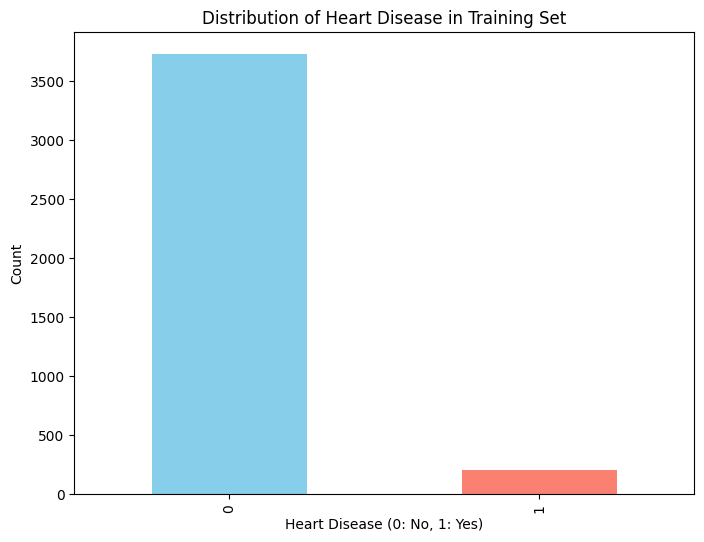

In [33]:
## cleaning heart_disease var:

var = 'heart_disease'

# Exploring missing values
print('Training Set:')
print(gdf_train[var].describe())  # count looks right
print('Total Missings: \n', sum(gdf_train[var].isnull()), '\n')  # confirms checks for NAs

print('Test Set:')
print(gdf_test[var].describe())  # count looks right
print('Total Missings: \n', sum(gdf_test[var].isnull()), '\n')  # confirms checks for NAs

# No nulls need to be removed, this finding is compatible with the value count listed in the describe() output above

# Take a look at the distribution of heart_disease
plt.figure(figsize=(8, 6))
gdf_train[var].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Heart Disease in Training Set')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [34]:
print(pd.crosstab(gdf_train[var],gdf_train['stroke']),'\n') # Heart disease seems to have a strong correlation with stroke compared to other variables, will be a good indicator
print(pd.crosstab(gdf_test[var],gdf_test['stroke']),'\n') 

stroke            0    1
heart_disease           
0              3590  137
1               167   34 

stroke           0   1
heart_disease         
0              907  32
1               36   6 



In [35]:
#seems counteractive as popele without heart disease are more likely to have a stroke but people with heartdisease are most likely to not have a stroke then have a stroke. 

Training Set:
count    3928.000000
mean        0.093432
std         0.291074
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64
Total Missings: 
 0 

Test Set:
count    981.000000
mean       0.085627
std        0.279955
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: hypertension, dtype: float64
Total Missings: 
 0 



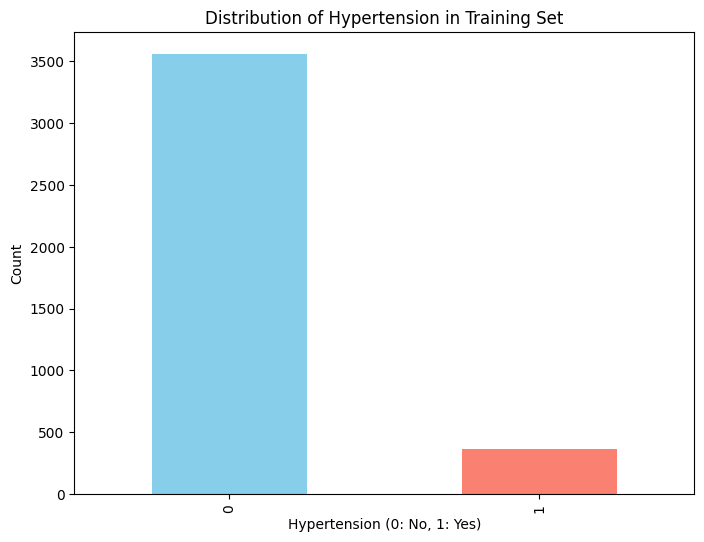

In [36]:
## cleaning hypertension var:

var = 'hypertension'

# Exploring missing values
print('Training Set:')
print(gdf_train[var].describe())  # count looks right
print('Total Missings: \n', sum(gdf_train[var].isnull()), '\n')  # confirms checks for NAs

print('Test Set:')
print(gdf_test[var].describe())  # count looks right
print('Total Missings: \n', sum(gdf_test[var].isnull()), '\n')  # confirms checks for NAs

# No nulls need to be removed, this finding is compatible with the value count listed in the describe() output above

# Take a look at the distribution of heart_disease
plt.figure(figsize=(8, 6))
gdf_train[var].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Hypertension in Training Set')
plt.xlabel('Hypertension (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [37]:
print(pd.crosstab(gdf_train[var],gdf_train['stroke']),'\n') # Hypertension seems to have a strong correlation with stroke compared to other variables, will be a good indicator
print(pd.crosstab(gdf_test[var],gdf_test['stroke']),'\n') 

stroke           0    1
hypertension           
0             3440  121
1              317   50 

stroke          0   1
hypertension         
0             869  28
1              74  10 



Training Set:
count       3928
unique         3
top       Female
freq        2317
Name: gender, dtype: object
Female    2317
Male      1610
Other        1
Name: gender, dtype: int64
Female    2317
Male      1610
Name: gender, dtype: int64
Total Missings: 
 0 

Test Set:
count        981
unique         2
top       Female
freq         580
Name: gender, dtype: object
Female    580
Male      401
Name: gender, dtype: int64
Total Missings: 
 0 



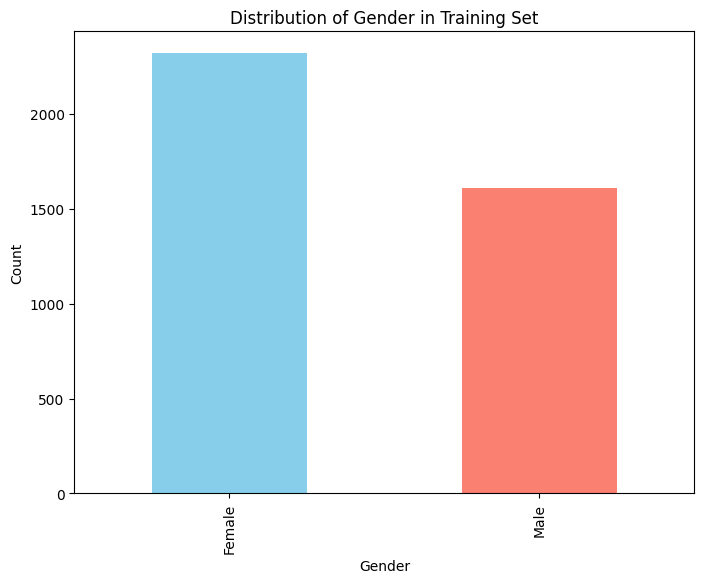

In [38]:
## cleaning gender var:

var = 'gender'

# Exploring missing values
print('Training Set:')
print(gdf_train[var].describe())  # count looks right
print(gdf_train[var].value_counts()) #need to remove other
gdf_train = gdf_train[gdf_train[var] != 'Other']
print(gdf_train[var].value_counts())

print('Total Missings: \n', sum(gdf_train[var].isnull()), '\n')  # confirms checks for NAs

print('Test Set:')
print(gdf_test[var].describe())  # count looks right, notice, there are onlu two unique values, so will have to manually enter Other in one hot encoding
print(gdf_test[var].value_counts())  # count looks right
gdf_test = gdf_test[gdf_test[var] != 'Other']

print('Total Missings: \n', sum(gdf_test[var].isnull()), '\n')  # confirms checks for NAs

# No nulls need to be removed, this finding is compatible with the value count listed in the describe() output above

# Take a look at the distribution of heart_disease
plt.figure(figsize=(8, 6))
gdf_train[var].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Gender in Training Set')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [39]:
print(pd.crosstab(gdf_train[var],gdf_train['stroke']),'\n') # Can't conclude anything
print(pd.crosstab(gdf_test[var],gdf_test['stroke']),'\n') 

stroke     0   1
gender          
Female  2220  97
Male    1536  74 

stroke    0   1
gender         
Female  557  23
Male    386  15 



Training Set:
count     3927
unique       2
top        Yes
freq      2568
Name: ever_married, dtype: object
Total Missings: 
 0 

Test Set:
count     981
unique      2
top       Yes
freq      636
Name: ever_married, dtype: object
Total Missings: 
 0 



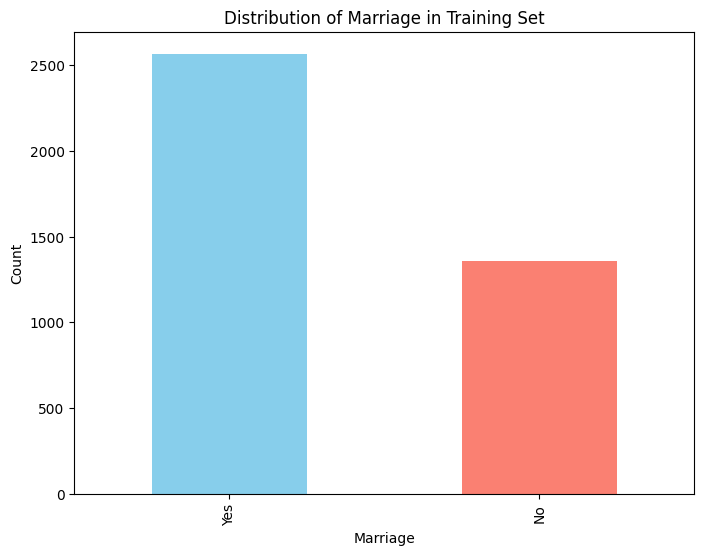

In [40]:
## cleaning ever_married var:

var = 'ever_married'

# Exploring missing values
print('Training Set:')
print(gdf_train[var].describe())  # count looks right
print('Total Missings: \n', sum(gdf_train[var].isnull()), '\n')  # confirms checks for NAs

print('Test Set:')
print(gdf_test[var].describe())  # count looks right
print('Total Missings: \n', sum(gdf_test[var].isnull()), '\n')  # confirms checks for NAs

# No nulls need to be removed, this finding is compatible with the value count listed in the describe() output above

# Take a look at the distribution of heart_disease
plt.figure(figsize=(8, 6))
gdf_train[var].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Marriage in Training Set')
plt.xlabel('Marriage')
plt.ylabel('Count')
plt.show()

In [41]:
print(pd.crosstab(gdf_train[var],gdf_train['stroke']),'\n') # Marriage does seem to affect stroke rates
print(pd.crosstab(gdf_test[var],gdf_test['stroke']),'\n') 

stroke           0    1
ever_married           
No            1337   22
Yes           2419  149 

stroke          0   1
ever_married         
No            344   1
Yes           599  37 



In [42]:
## cleaning stroke var:

var = 'stroke'

# Exploring missing values
print('Training Set:')
print(gdf_train[var].describe())  # count looks right
print('Total Missings: \n', sum(gdf_train[var].isnull()), '\n')  # confirms checks for NAs

print('Test Set:')
print(gdf_test[var].describe())  # count looks right, notice
print('Total Missings: \n', sum(gdf_test[var].isnull()), '\n')  # confirms checks for NAs

# No nulls need to be removed, this finding is compatible with the value count listed in the describe() output above

Training Set:
count    3927.000000
mean        0.043545
std         0.204106
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64
Total Missings: 
 0 

Test Set:
count    981.000000
mean       0.038736
std        0.193063
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: stroke, dtype: float64
Total Missings: 
 0 



**Cleaned dataframes**

In [43]:
gdf_train.head()
gdf_train.describe()

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000,3927.000000
mean,2578.873186,36900.512605,42.997576,0.093456,0.051184,105.134069,28.925032,0.043545
std,1471.705431,21002.680798,22.475913,0.291107,0.220401,44.162948,7.843391,0.204106
min,1.000000,84.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,1314.000000,18234.000000,25.000000,0.000000,0.000000,77.140000,23.600000,0.000000
50%,2575.000000,37446.000000,44.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,3854.500000,54983.500000,60.000000,0.000000,0.000000,113.245000,33.100000,0.000000
max,5110.000000,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [44]:
gdf_test.head()
gdf_test.describe()

,Unnamed: 0,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,2556.417941,37700.556575,42.353354,0.085627,0.042813,105.951233,28.772579,0.038736
std,1468.152800,20965.050908,22.878740,0.279955,0.202540,45.478624,7.900756,0.193063
min,23.000000,77.000000,0.160000,0.000000,0.000000,55.250000,11.500000,0.000000
25%,1201.000000,20162.000000,23.000000,0.000000,0.000000,76.630000,23.300000,0.000000
50%,2596.000000,38069.000000,44.000000,0.000000,0.000000,90.650000,27.900000,0.000000
75%,3837.000000,55744.000000,60.000000,0.000000,0.000000,114.610000,32.900000,0.000000
max,5109.000000,72861.000000,82.000000,1.000000,1.000000,263.560000,64.800000,1.000000


Creating numerical dataframes using one hot encoding so a decision tree can be used

In [45]:
#linear model

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

In [88]:

#trying just with numeric values

y_test = gdf_test['stroke']
y_train = gdf_train['stroke']
X_trainV = gdf_train.loc[:,['hypertension','log_bmi','heart_disease','log_avg_glucose'] ]
X_testV = gdf_test.loc[:,['hypertension','log_bmi','heart_disease','log_avg_glucose'] ]


reg = LinearRegression().fit(X_trainV, y_train) # Fit the linear model
y_pred = reg.predict(X_testV)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

(reg.intercept_) # Intercept value
(reg.coef_) # Regression coefficients
print(reg.score(X_testV, y_test),"is the R^2 value") # R squared measure 
print(rmse, "is the RMSE value")


0.028238261433492617 is the R^2 value
0.1902210326675803 is the RMSE value


In [89]:
#trying with cat vars
catDF_test = gdf_test[["work_type", "Residence_type", "smoking_status", "ever_married"]]
X_testC = pd.get_dummies(catDF_test, dtype='int')
catDF_train = gdf_train[["work_type", "Residence_type", "smoking_status", "ever_married"]]
X_trainC = pd.get_dummies(catDF_train, dtype='int')

reg = LinearRegression().fit(X_trainC, y_train) # Fit the linear model
y_pred = reg.predict(X_testC)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

(reg.intercept_) # Intercept value
(reg.coef_) # Regression coefficients
print(reg.score(X_testC, y_test),"is the R^2 value") # R squared measure 
print(rmse, "is the RMSE value")


0.015803836185019127 is the R^2 value
0.19143417511172128 is the RMSE value


In [90]:
#joined cat and var
X_test = pd.concat([X_testC,X_testV],axis=1)
X_train= pd.concat([X_trainC,X_trainV],axis=1)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
y_pred = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

(reg.intercept_) # Intercept value
(reg.coef_) # Regression coefficients
print(reg.score(X_test, y_test),"is the R^2 value") # R squared measure 
print(rmse, "is the RMSE value")


0.03497777400607871 is the R^2 value
0.18956025981151997 is the RMSE value


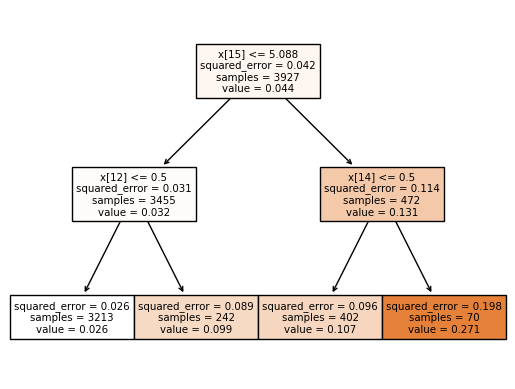

R^2 value  0.03401009070436323
RMSE:  0.18971415735981856


In [91]:
## Decision Tree Model
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

tree_model = tree.DecisionTreeRegressor(max_depth=2) # Set up the tree
cart = tree_model.fit(X_train, y_train) # Fit the tree
tree.plot_tree(cart,filled=True) # Visualize the tree
plt.show()


# Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test) # Run test data through model to get y predictions
N_test = len(y_test) # number of outputs
residuals_cart = y_test - y_hat_cart # difference between predicted and real values

# Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 ) # Sum of squared errors
MSE_cart = SSE_cart/N_test # Mean of sum of squarerd errors
RMSE_cart = (MSE_cart)**(1/2) # Root of mean of sum of squared errors
TSS = np.sum( (y_test - y_train.mean())**2 )
R2_cart = 1 - SSE_cart/TSS # Coefficient of determination
print('R^2 value ', R2_cart) # R squared measure
print('RMSE: ', RMSE_cart)

In [96]:
#with expander get the same thing
X_test = pd.concat([X_testC,X_testV],axis=1)
X_train= pd.concat([X_trainC,X_trainV],axis=1)

from sklearn.metrics import r2_score
expander = PolynomialFeatures(degree=1,include_bias=False) # Create the expander
#
Z_train = expander.fit_transform(X_train) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe
#
Z_test = expander.fit_transform(X_test) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(X_train_lm, y_train) # Fit the linear model
# Predicted values:
y_hat_lm = reg.predict(X_test_lm)

## Metrics:
rmse = np.sqrt(mean_squared_error(y_test, y_hat_lm))
r_squared = r2_score(y_test, y_hat_lm)

print(r_squared, "this is the R^2 value for degree of 1")
print(rmse, "this is the RMSE value for degree of 1")

0.07238771748835782 this is the R^2 value for degree of 1
0.18584970776885143 this is the RMSE value for degree of 1


In [116]:
## KNeighborsRegressor Model
from sklearn.neighbors import KNeighborsRegressor

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to each column of X:
X_train_knn = X_train.apply(maxmin)
X_test_knn = X_test.apply(maxmin)


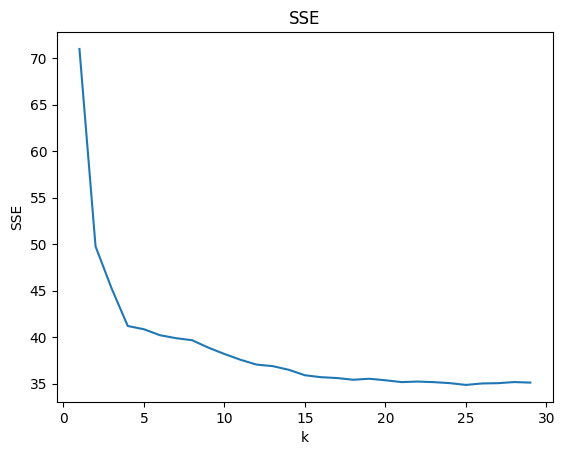

In [117]:
k_bar = 30
k_grid = np.arange(1,k_bar) # The range of k's to consider
SSE = np.zeros(k_bar-1) # For comparison purposes, store the training error
for k in range(k_bar-1):
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train_knn,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test_knn) # Predict values for test set
    SSE[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
SSE_min = np.min(SSE) # Lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index][0] # Find the optimal value of k

# SSE plot:
plt.plot(k_grid,SSE)
plt.xlabel("k")
plt.ylabel("SSE")
plt.title('SSE')
plt.show()

In [118]:
# Fit optimal model:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=max(4,k_star))
knn_star = knn_model.fit(X_train_knn,y_train)
y_hat_knn = knn_star.predict(X_test_knn)
residuals_knn = y_test - y_hat_knn

In [119]:
# Calculate RMSE and R^2
SSE_knn = np.sum( (y_test-y_hat_knn)**2 )
MSE_knn = SSE_knn/N_test
RMSE_knn = (SSE_knn/N_test)**(1/2)
R2_knn = 1 - SSE_knn/TSS
print(f'RMSE: {RMSE_knn:.2f}')
print(f'R^2: {R2_knn:.2f}')

RMSE: 0.19
R^2: 0.05


In [120]:
## Comparison Table:
gdf = pd.DataFrame({'RMSE':[RMSE_lm,RMSE_cart,RMSE_knn],
                    'R2':[R2_lm,R2_cart,R2_knn]})
gdf.index = ['LM','TREE','KNN']
gdf.head()

,RMSE,R2
LM,0.198518,-0.058381
TREE,0.186737,0.064091
KNN,0.188475,0.046585


kNN was clearly better than the others, so we used it as a base to build a model that integrates a few types of models.

In [ ]:
##  Decision Tree Regressor with a KNN neighbors model

# from sklearn.ensemble import VotingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score

# # Initialize the Decision Tree Regressor and KNN Regressor models
# dt_model = DecisionTreeRegressor(max_depth=5)
# knn_model = KNeighborsRegressor(n_neighbors=10)  # You can adjust the number of neighbors (k)

# # Initialize the Voting Regressor with both models
# voting_model = VotingRegressor(estimators=[('decision_tree', dt_model), ('knn', knn_model)])

# # Train the ensemble model
# voting_model.fit(X_train, y_train.values.ravel())  # Note: ravel() is used to convert y_train to a 1D array

# # Make predictions on the test set
# y_pred_voting = voting_model.predict(X_test)

# # Calculate RMSE for the ensemble model
# rmse_voting = mean_squared_error(y_test, y_pred_voting, squared=False)
# print(f'RMSE: {rmse_voting:.2f}')

# # Calculate R-squared for the ensemble model
# r2_voting = r2_score(y_test, y_pred_voting)
# print(f'R^2: {r2_voting:.2f}')

# BELOW THIS IS WHAT WAS ORIGINALLY IN THE FILE

In [ ]:
y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())

In [ ]:
## Linear Model
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_train_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
dummies = pd.concat([ pd.get_dummies(X_train['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_train = pd.concat([continuous,dummies],axis=1)

X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_test_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_test['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_test = pd.concat([continuous,dummies],axis=1)

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(Z_train, y_train) # Fit the linear model
print('R2: ', reg.score(Z_test, y_test)) # R squared measure
y_hat = reg.predict(Z_test)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )   # R squared measure


This is supposed to be fairly "fun," so please do not turn it into a combinatorial nightmare of comparing thousands of model specifications. Settle on a strategy you think is promising, crank it out, and write up the results. Your time and energy are valuable, so learn to recognize when the marginal cost of another twenty minutes on a project exceeds the benefit in terms of improving the results and your grade.
  
## Paper format

The format of the paper should be:

  - Summary: A one paragraph description of the question, methods, and results (about 350 words).
  - Data: One to two pages discussing the data and key variables, and any challenges in reading, cleaning, and preparing them for analysis.
  - Results: Two to five pages providing visualizations, statistics, a discussion of your methodology, and a presentation of your main findings. 
  - Conclusion: One to two pages summarizing the project, defending it from criticism, and suggesting additional work that was outside the scope of the project.
  - Appendix: If you have a significant number of additional plots or table that you feel are essential to the project, you can put any amount of extra content at the end and reference it from the body of the paper. 

## Submission

Half of each student's grade is based on their commits to the repo. Each student is expected to do something specific that contributes to the overall project outcome. Since commits are recorded explicitly by Git/GitHub, this is observable. A student can contribute by cleaning data, creating visualizations,performing analytic analyses,  or writing about results, but everyone has to do something substantial. A student's work doesn't need to make it into the final report to be valuable and substantial, and fulfill the requirement to make a contribution to the project. 

The other half of each student's grade is based on the written report. Groups will work together on combining results and writing up findings in a Jupyter noteb,ok, using code chunks to execute Python commands and markdown chunks to structure the paper and provide exposition. The notebook should run on Colab or Rivana from beginning to end without any errors.

mbers submit.

## Criteria

The project is graded based on four criteria:

  - Project Concept: What is the strategy for building and testing the group's models? How did the group decide how to use the tools presented so far in class? How did the group compare the performance of the options considered, and settle on a final choice for submission?
  - Wrangling, EDA, and Visualization: How are are missing values handled? For variables with large numbers of missing values, to what extent do the data and documentation provide an explanation for the missing data? If multiple data sources are used, how are the data merged? For the main variables in the analysis, are the relevant data summarized and visualized through a histogram or kernel density plot where appropriate? Are basic quantitative features of the data addressed and explained? How are outliers characterized and addressed? 
  - Analysis: What are the groups' main findings? Do the tables, plots, and statistics support the conclusions? Is the research strategy carried out correctly? If the research strategy succeeds, are the results interpreted correctly and appropriately? If the research strategy fails, is a useful discussion of the flaws of the data collection process or the research strategy discussed?
  - Replication/Documentation: Is the code appropriately commented? Can the main results be replicated from the code and original data files? Are significant choices noted and explained?

Each of the four criteria are equally weighted (25 points out of 100).